# Collect and Clean Twitter Data

To access the Twitter API, we will make use of the Python library **_Tweepy_**. Let's start by importing tweepy and other libraries needed for this tutorial.

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
# ___Cell no. 1___

import tweepy
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<hr>

## Section 1: Data Collection

In order to access the Twitter API to collect Twitter data, we'll need to enter user credentials into the existing **twitter_credentials.py** file. 

In [3]:
# ___Cell no. 2___

# We then import the credentials
import twitter_credentials as tc

Next, we authenticate using our API keys and tokens as follows:

In [4]:
# ___Cell no. 3___

# Create an authentication object of the AuthHandler class by passing in the credentials
auth = tweepy.OAuthHandler(tc.api_key, tc.api_secret_key)

# Set the access tokens to complete the authentication process
auth.set_access_token(tc.access_token, tc.access_token_secret)

We then create the API object while passing in the authentication information

In [5]:
# ___Cell no. 4___

api = tweepy.API(auth, wait_on_rate_limit=True)

In the above line of code we also ensure that if we are rate limited by the Twitter api while submitting queries, we will wait until the rate limit time has lapsed and then continue to collect data.

We are now ready to build a Standard API search query. 

In [28]:
# ___Cell no. 5___

# Enter your search words in accordance with the basic filtering rules
search_words = "msunu OR voestek OR tsek OR kafir OR gwirha OR dhika OR umbi OR uyanuka OR umuncu OR mnqundu OR uyinyoka OR sembi"

# We also want to exclude retweets and replies as this may sway results
my_search = search_words + " -filter:retweets" + " -filter:replies"  

Below is a simple API search where we filter tweets based on our chosen search words and the language. The extended tweet mode allows us to load the full text of the tweet which is otherwise truncated.

In [29]:
# ___Cell no. 6___

# The Twitter data is stored in a Tweet object which we've called tweets
tweets = api.search_tweets(q=my_search,lang="en",tweet_mode="extended",count=10000)

Now let's print the text of the first 20 tweets to see if our query is working correctly.

In [30]:
# ___Cell no. 7___

# Iterate and print tweets
i = 1
for tweet in tweets[0:20]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1 

1) Cry more msunu https://t.co/k1RGE69fkZ

2) I feel so disrespected by this person 😡 how the fk do you write a whole article with one source msunu? Yesses… ixesha lam. 

Why did he give this to me to review?

3) Go-West https://t.co/TeYE69zSOR

4) TbangersXThabang lifetime ship keh sana🥰💥🤲,you can rant all you want in this tl😂🚮,you are nothing Thabang had been forever woke,niyanya nonke shippers se voet tsek,get it through your thick skulls..leave Thabang alone zinja!! 

THABANG FOREVER YENA 
Thabang 
#ThabangMazibuko https://t.co/DdfthmuE4t

5) also dis kafir think taliban is anti white 

he really got westernized like every other communist https://t.co/SdplonIgC5

6) Muslims: #Islam doesn't see race

Also #Muslims. Fighting with each other over intermarrying between different races

🤣😂🤣 https://t.co/j1uu1DKyYQ

7) They knew they won't be allowed there due to security reasons but still tried. Police had to stop them and they got few pictures and videos to play victim. Noice planning 

Above we have accessed only the text ('full_text') attribute of the Tweet object 'tweets'. Lets have a quick look at all the data associated with a single tweet by printing the first index of the 'tweets' object.

In [31]:
# ___Cell no. 8___

print(tweets[0])

Status(_api=<tweepy.api.API object at 0x00000235BB943D90>, _json={'created_at': 'Sun May 28 11:20:08 +0000 2023', 'id': 1662780794010497031, 'id_str': '1662780794010497031', 'full_text': 'Cry more msunu https://t.co/k1RGE69fkZ', 'truncated': False, 'display_text_range': [0, 14], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/k1RGE69fkZ', 'expanded_url': 'https://twitter.com/vephala/status/1662779260841480193', 'display_url': 'twitter.com/vephala/status…', 'indices': [15, 38]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1420248766423126017, 'id_str': '1420248766423126017', 'name': '🅵🆁🅰🅽🅲🅾', 'screen_name': 'ZukzFranco', 'location': 'Cape Town, Sout

In [32]:
# ___Cell no. 9___

# Our new method of collecting the tweets
tweets = tweepy.Cursor(api.search_tweets,q=my_search,lang="en",tweet_mode='extended').items(10000)

Below we extract the full text of the tweet, as well as the date and time information and the user location (as entered by the respective user). This process should take about 2 minutes - note the time [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) at the top of the cell which will inform us of the runtime of this particular cell.

In [33]:
%%time

# ___Cell no. 10___

# Extract the info we need from the tweets object
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

CPU times: total: 3.03 s
Wall time: 1min 26s


In [12]:
# ___Cell no. 11___

# Put our data into a dataframe 
df = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df

,tweet_id_str,date_time,location,tweet_text
0,1662772187386859521,2023-05-28 10:45:56+00:00,"Cape Town, South Africa",I feel so disrespected by this person 😡 how th...
1,1662771408190189568,2023-05-28 10:42:51+00:00,teuingland,Go-West https://t.co/TeYE69zSOR
2,1662760356089872387,2023-05-28 09:58:56+00:00,"KwaZulu, South Africa",For 100s of years we've been the most hated......
3,1662757690181918721,2023-05-28 09:48:20+00:00,,Stick to your favourite msunu kanyoko https://...
4,1662755483944472576,2023-05-28 09:39:34+00:00,South Africa,Go to your nearest police station and open a c...
...,...,...,...,...
309,1659279852212482061,2023-05-18 19:28:39+00:00,eBhodasia,Honestly 🔥🧎‍♀️ https://t.co/MaAVefUzUd
310,1659278305164423183,2023-05-18 19:22:30+00:00,"Soweto, South Africa",Marvin already wore it on his behalf msunu.\n\...
311,1659274482719105032,2023-05-18 19:07:19+00:00,eBhodasia,Yabona when it comes to my little brother? I w...
312,1659259383396671494,2023-05-18 18:07:19+00:00,,Msunu Cyril must go!!


In [34]:
# ___Cell no. 12___

for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 feel disrespected person fk write whole article one source msunu ? yesses ixesha lam. give review ? 

2 go west 

3 100s years ' hated ... #msunu #mkhwebane #eskom 

4 stick favourite msunu kanyoko 

5 go nearest police station open case football come complain rubbish msunu kanyoko 

6 say sekhukhune united robbed , go open case nearest police station ... msunu yenu ! 

7 imagine thing calling juicy names rhaaaa mnqundu wenja 

8 congratulations karan sharma successfully completing research project entitled ' silico characterization expression analysis cinnamate 4 hydroxylase c4h gene family vanilla planifolia ' part master ' dissertation year. jk 

9 start dropshipping still booming sa , age restrictions free telegram group hammanskraal cyan sleeping msunu naledi tsatsi naledi pitso ipeleng teko drop shipping 

10 must frustration creeping editor ... sembi ! 

11 offer carpet upholstery cleaning services. dm cleaning za 0671888154 call wapp gauteng lorch thando msunu kaizer chiefs b

<hr>

## Section 2: Data Cleaning and Pre-processing

Before we start to analyse our data, we need to perform some cleaning and preprocessing of the text in order to get meaningful results from NLP techniques. The function below will clean the data by removing hyperlinks, special characters, emojis and @mentions from the tweets. This is achieved by using the [Regular Expressions](https://www.tutorialspoint.com/python/python_reg_expressions.htm) module **re** to serach for an expression (r'expression') and replace it with an empty string using the method **sub**.

In [35]:
# ___Cell no. 13___

def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

In [36]:
# ___Cell no. 14___

# Apply the clean_text function to the 'tweet_text' column
df['tweet_text']=df['tweet_text'].apply(clean_text)

Now let's print the text from the first 20 tweets once again to have a look at the changes after cleaning.

In [37]:
# ___Cell no. 15___

for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 feel disrespected person fk write whole article one source msunu ? yesses ixesha lam. give review ? 

2 go west 

3 100s years ' hated ... #msunu #mkhwebane #eskom 

4 stick favourite msunu kanyoko 

5 go nearest police station open case football come complain rubbish msunu kanyoko 

6 say sekhukhune united robbed , go open case nearest police station ... msunu yenu ! 

7 imagine thing calling juicy names rhaaaa mnqundu wenja 

8 congratulations karan sharma successfully completing research project entitled ' silico characterization expression analysis cinnamate 4 hydroxylase c4h gene family vanilla planifolia ' part master ' dissertation year. jk 

9 start dropshipping still booming sa , age restrictions free telegram group hammanskraal cyan sleeping msunu naledi tsatsi naledi pitso ipeleng teko drop shipping 

10 must frustration creeping editor ... sembi ! 

11 offer carpet upholstery cleaning services. dm cleaning za 0671888154 call wapp gauteng lorch thando msunu kaizer chiefs b

You will notice that hyperlinks, spaces and other special characters have been removed. We have left in the '#' symbol due to it's relevance in tweets.

We then convert all the tweet texts to lower case. This is done so that words that exist in both their lower case or upper case forms (or indeed a mixture of the two) in our text are not processed as two different words.

In [44]:
# ___Cell no. 16___

df['tweet_text']=df['tweet_text'].str.lower()
df

,Unnamed: 0,tweet_id_str,date_time,location,tweet_text,label
0,0,1662772187386859521,2023-05-28 10:45:56+00:00,"Cape Town, South Africa",feel disrespected person fk write whole articl...,offensive
1,1,1662771408190189568,2023-05-28 10:42:51+00:00,teuingland,go west,NaN
2,2,1662760356089872387,2023-05-28 09:58:56+00:00,"KwaZulu, South Africa",100s years ' hated ... #msunu #mkhwebane #eskom,offensive
3,3,1662757690181918721,2023-05-28 09:48:20+00:00,NaN,stick favourite msunu kanyoko,offensive
4,4,1662755483944472576,2023-05-28 09:39:34+00:00,South Africa,go nearest police station open case football c...,offensive
...,...,...,...,...,...,...
309,309,1659279852212482061,2023-05-18 19:28:39+00:00,eBhodasia,honestly,NaN
310,310,1659278305164423183,2023-05-18 19:22:30+00:00,"Soweto, South Africa",marvin already wore behalf msunu. thabang cham...,offensive
311,311,1659274482719105032,2023-05-18 19:07:19+00:00,eBhodasia,"yabona comes little brother ? wash hands , uth...",NaN
312,312,1659259383396671494,2023-05-18 18:07:19+00:00,NaN,msunu cyril must go ! !,offensive


In [45]:
# ___Cell no. 17___

# Get the list of NLTK stop words

stopWords = stopwords.words("english")

In [46]:
# ___Cell no. 18___

# Let's have a quick look at what words nltk considers to be stop words
stopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

We can also extend the NLTK stopwords list by adding stopwords of our own. For example, we would want to add the words that we used in our search query, as we are guaranteed that at least one of these words will occur in each tweet and should thus be excluded from our corpus (In NLP, the word _corpus_ refers to a collection of texts to be analysed).

In [47]:
# ___Cell no. 19___

# Define our own list of stopwords
my_stopwords = ['climate change', 'cold', 'hot', 'help' , 'cause', ]

# Extend the nltk stopwords list
stopWords.extend(my_stopwords)

In [48]:
# ___Cell no. 20___

def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopWords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [49]:
# ___Cell no. 21___

# Apply the stopword removal function to the text of all tweets
df['tweet_text']=df['tweet_text'].apply(remove_stopwords)

# Print the first 20 tweets
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 feel disrespected person fk write whole article one source msunu ? yesses ixesha lam. give review ? 

2 go west 

3 100s years ' hated ... #msunu #mkhwebane #eskom 

4 stick favourite msunu kanyoko 

5 go nearest police station open case football come complain rubbish msunu kanyoko 

6 say sekhukhune united robbed , go open case nearest police station ... msunu yenu ! 

7 imagine thing calling juicy names rhaaaa mnqundu wenja 

8 congratulations karan sharma successfully completing research project entitled ' silico characterization expression analysis cinnamate 4 hydroxylase c4h gene family vanilla planifolia ' part master ' dissertation year. jk 

9 start dropshipping still booming sa , age restrictions free telegram group hammanskraal cyan sleeping msunu naledi tsatsi naledi pitso ipeleng teko drop shipping 

10 must frustration creeping editor ... sembi ! 

11 offer carpet upholstery cleaning services. dm cleaning za 0671888154 call wapp gauteng lorch thando msunu kaizer chiefs b

Now that we've cleaned and preprocessed our tweet text, let's get a quick idea of the common words that appear in the tweets in the form of a Word Cloud!

In [50]:
df.to_csv(r'C:\Users\HP\Desktop\MSc\Myfile1.csv')

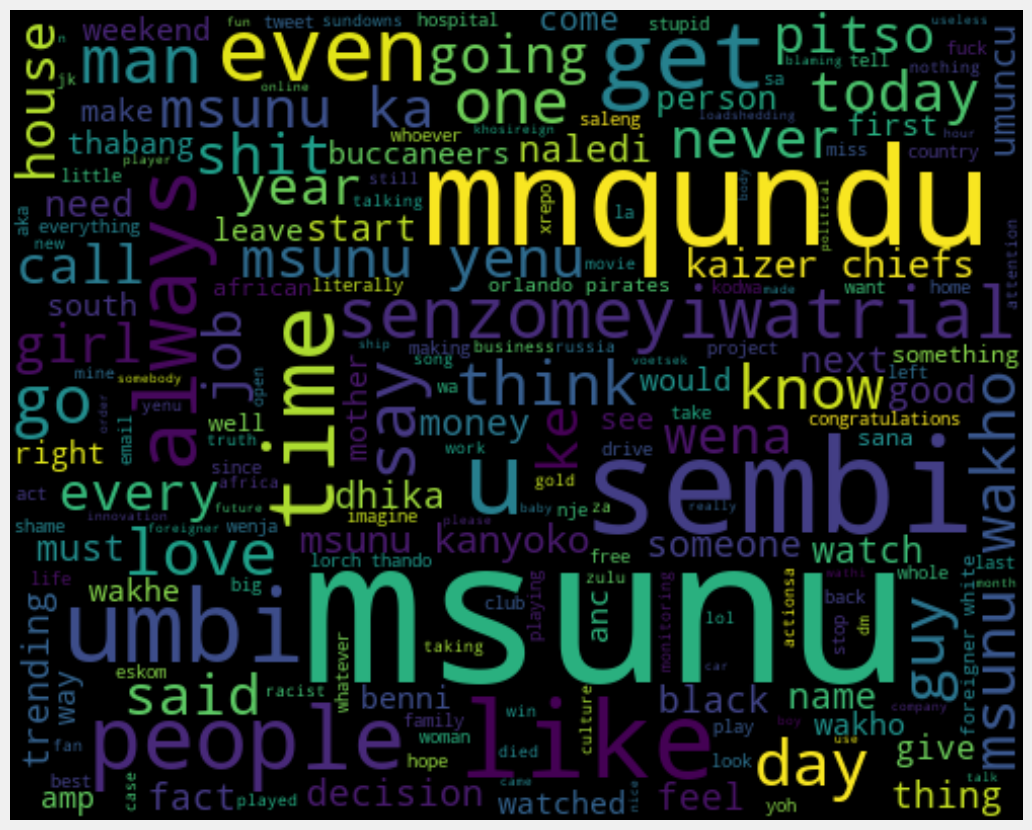

In [51]:
# ___Cell no. 22___

# Plot a word cloud

all_words = ' '.join( [data for data in df['tweet_text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopWords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
import pandas as pd

df = pd.read_csv('Myfile1.csv')

label = {'offensive': ('sundinyela', 'voestek', 'tsek', 'kafir', 'uyanya', 'unyile', 'uyakaka', 'umuncu', 'msunu', 'mnqundu', 'bentse', 'bhentse', 'masimba', 'sende'), 'nonoffensive': ('sundiqhela', 'uyandiqhela', 'usile', 'uyagheza', 'uligheza', 'sembhi', 'sembi', 'umbi', 'shame')}

def fetchlabel(x):
    for key, values in label.items():
        for value in values:
            if value in x.lower():
                return key
    else:
        return np.nan

df['label'] = df['tweet_text'].apply(fetchlabel)


<hr>

In [53]:
df

,Unnamed: 0.1,Unnamed: 0,tweet_id_str,date_time,location,tweet_text,label
0,0,0,1662772187386859521,2023-05-28 10:45:56+00:00,"Cape Town, South Africa",feel disrespected person fk write whole articl...,offensive
1,1,1,1662771408190189568,2023-05-28 10:42:51+00:00,teuingland,go west,NaN
2,2,2,1662760356089872387,2023-05-28 09:58:56+00:00,"KwaZulu, South Africa",100s years ' hated ... #msunu #mkhwebane #eskom,offensive
3,3,3,1662757690181918721,2023-05-28 09:48:20+00:00,NaN,stick favourite msunu kanyoko,offensive
4,4,4,1662755483944472576,2023-05-28 09:39:34+00:00,South Africa,go nearest police station open case football c...,offensive
...,...,...,...,...,...,...,...
309,309,309,1659279852212482061,2023-05-18 19:28:39+00:00,eBhodasia,honestly,NaN
310,310,310,1659278305164423183,2023-05-18 19:22:30+00:00,"Soweto, South Africa",marvin already wore behalf msunu. thabang cham...,offensive
311,311,311,1659274482719105032,2023-05-18 19:07:19+00:00,eBhodasia,"yabona comes little brother ? wash hands , uth...",NaN
312,312,312,1659259383396671494,2023-05-18 18:07:19+00:00,NaN,msunu cyril must go ! !,offensive


In [54]:
df.to_csv(r'C:\Users\HP\Desktop\MSc\labelled3.csv')

## Section 3: Refining your Twitter API search query

We can also further refine a Twitter API search to include the dates from which we would like to collect tweets, as well as the location. The **__geocode__** parameter allows you to define the latitude and longitude of a location, as well a "search radius" - you will also specify the radius units, i.e. "km".

<div class="alert alert-block alert-info">
    
<b>Note:</b> The standard Twitter API only allows you to access tweets from the last 7 days, so be sure to adjust the dates in the code accordingly.

</div>

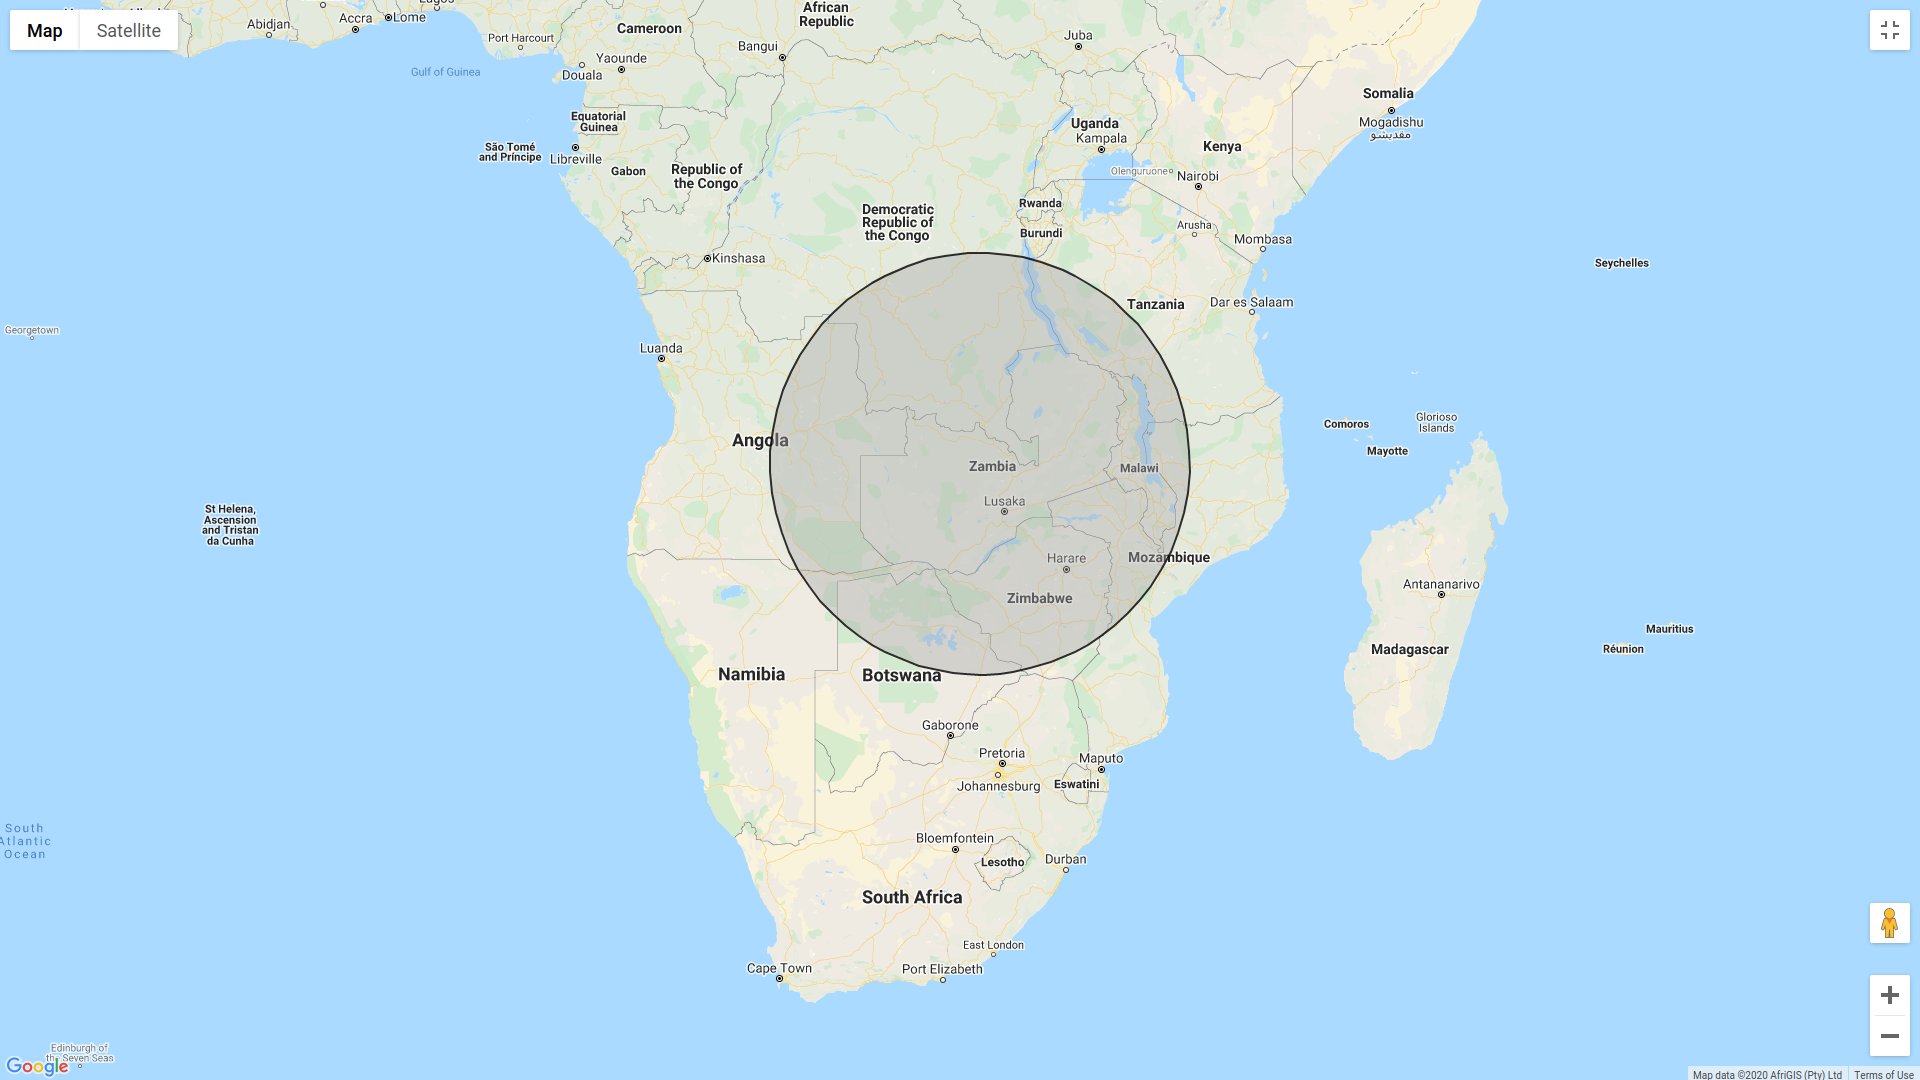

In [30]:
# ___Cell no. 23___

search_words = "msunu OR dhika OR umbi OR uyanuka OR umuncu OR mnqundu OR uyinyoka OR sembi"

# Latitude, logitude and search radius(km) for South Africa and some surrounding regions
loc = "-28.48322,24.676997,100km"

# Search dates
#date_since = "2023-05-"
#date_until = "2022-05-07"

# We also want to exclude retweets and replies as this may sway results
my_search = search_words + " -filter:retweets" + " -filter:replies"  

In [31]:
# ___Cell no. 24___

# Use the tweepy Cursor method to access tweets from a specified region and between certain dates
tweets = tweepy.Cursor(api.search_tweets,
                       q=my_search,
                       lang="en",
                       tweet_mode='extended',
                       geocode=loc,
                       since=date_since,
                       until=date_until).items(500)

In [32]:
%%time

# ___Cell no. 25___

# Once again, this should take ~2 minutes to run if you are collecting 1000 tweets
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

# Put our data into a dataframe 
df_new = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df_new

Unexpected parameter: since


CPU times: total: 62.5 ms
Wall time: 622 ms


,tweet_id_str,date_time,location,tweet_text


We see that the search region specified in our query is correct and that location information is now available for each tweet.